<a href="https://colab.research.google.com/github/rhehgus02/ESAA_OB/blob/main/OB_%EB%AF%B8%EB%8B%88%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B81_%EC%A0%84%EC%B2%98%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 확인

In [17]:
# 데이터 불러오기
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ESAA/OB/미니프로젝트1/insurance.csv")

In [18]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


>> null값은 없음

In [20]:
# 수치형 변수 확인
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


>> 이상치를 갖고 있는 것처럼 보이지는 않음

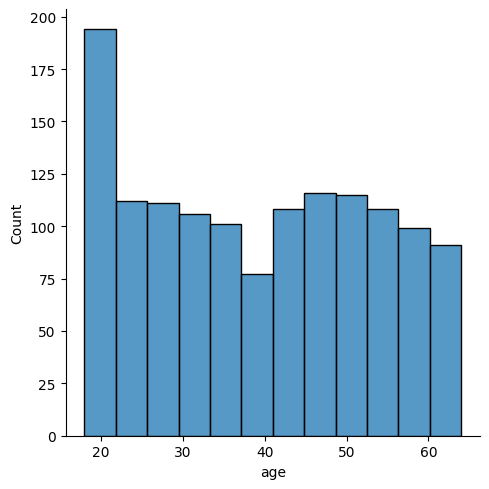

In [21]:
# age 칼럼 분포 확인
sns.displot(df["age"])
plt.show()

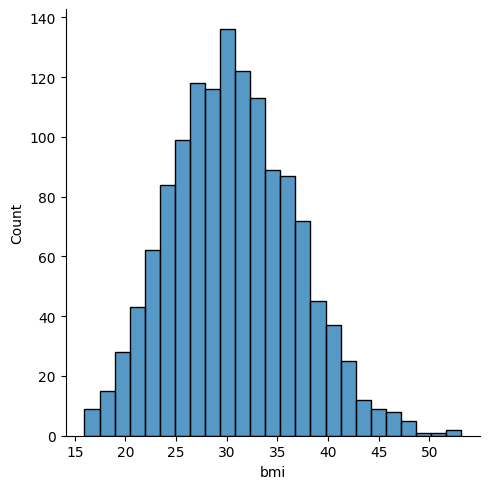

In [22]:
# bmi 칼럼 분포 확인
sns.displot(df["bmi"])
plt.show()

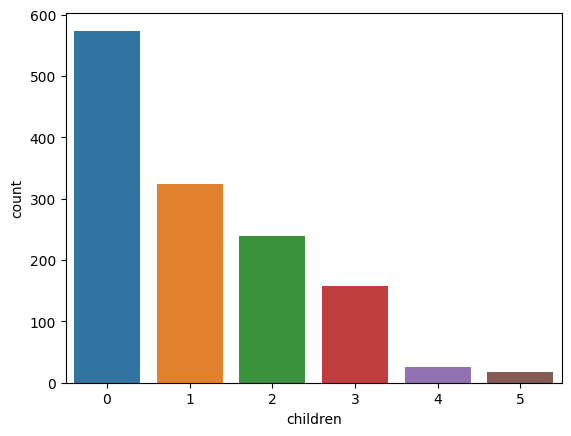

In [23]:
# children 칼럼 분포 확인
sns.countplot(x='children', data=df)
plt.show()

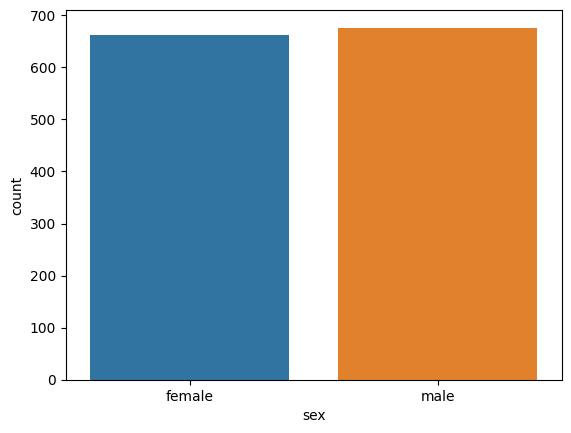

In [24]:
# sex 칼럼 분포 확인
sns.countplot(x='sex', data=df)
plt.show()

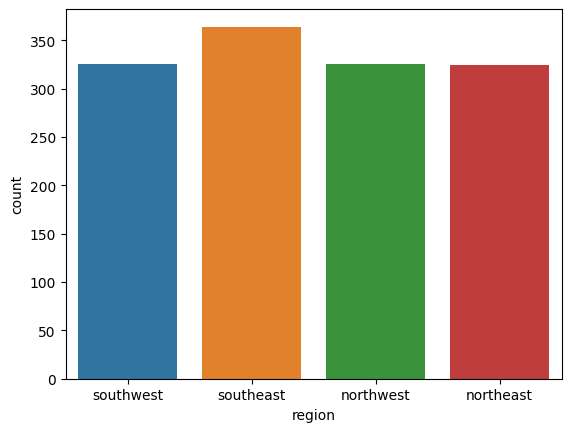

In [25]:
# region 칼럼 분포 확인
sns.countplot(x='region', data=df)
plt.show()

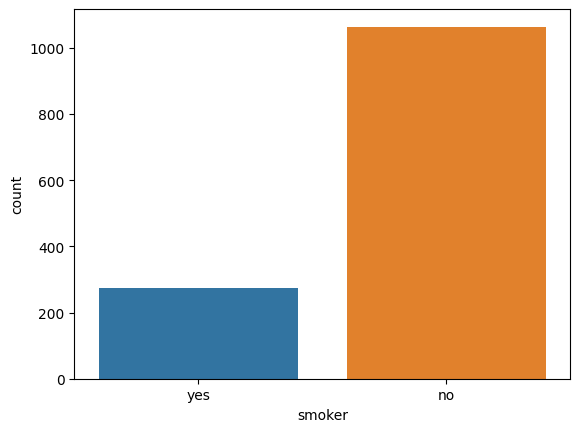

In [26]:
# smoker 칼럼 분포 확인
sns.countplot(x='smoker', data=df)
plt.show()

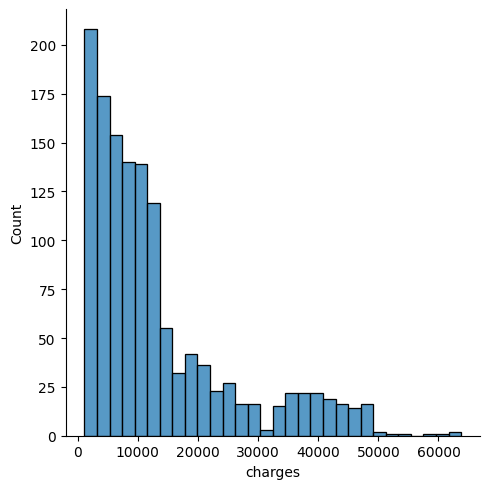

In [27]:
# charges 칼럼(target) 분포 확인
sns.displot(df["charges"])
plt.show()

>> 왼쪽에 쏠려 있음

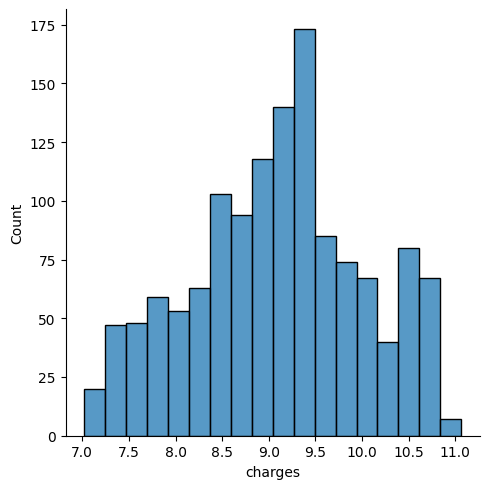

In [28]:
# log1p()를 적용한 charge 값의 분포 확인
y_log_transform = np.log1p(df["charges"])
sns.displot(y_log_transform)
plt.show()

>> 정규분포와 비슷해짐

# 데이터 전처리

In [29]:
# 원핫인코딩
df = pd.get_dummies(data=df, columns=['sex', 'smoker', 'region'])
df.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [30]:
# target 칼럼 로그 변환
df["charges"] = np.log1p(df["charges"])
df.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,9.734236,1,0,0,1,0,0,0,1
1,18,33.770,1,7.453882,0,1,1,0,0,0,1,0
2,28,33.000,3,8.400763,0,1,1,0,0,0,1,0
3,33,22.705,0,9.998137,0,1,1,0,0,1,0,0
4,32,28.880,0,8.260455,0,1,1,0,0,1,0,0


In [32]:
# X, y 구분
y = df['charges']
X = df.drop('charges', axis=1)

In [34]:
y

0        9.734236
1        7.453882
2        8.400763
3        9.998137
4        8.260455
          ...    
1333     9.268755
1334     7.699381
1335     7.396847
1336     7.605365
1337    10.279948
Name: charges, Length: 1338, dtype: float64

In [35]:
# 학습 및 테스트 데이터 분할
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
# 나중에 해줘야 할 것

# 테스트 데이터 세트의 Target 값은 로그 변환되었으므로 다시 expm1를 이용하여 원래 scale로 변환
#y_test_exp = np.expm1(y_test)

# 예측 값 역시 로그 변환된 타깃 기반으로 학습되어 예측되었으므로 다시 exmpl으로 scale변환
#pred_exp = np.expm1(pred)